In [1]:
import numpy as np 
import pandas as pd
import os, re
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import njit
from time import perf_counter as pc

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# plt.style.use(["notebook", "science"])
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.dpi"] = 150
plt.rcParams["lines.linewidth"] = 2

np.set_printoptions(linewidth=200)
np.set_printoptions(precision=3)

# TODO
1. Transform one sample to the perturbed version.
2. Use a function to transform all samples. 
3. Use the perturbed dataset as the current dataset and apply the function defined in step 2 to add even more perturbation. 

In [2]:
map_path = "raw txt-input 6186 samples 10 nodes/"

dir_list = os.listdir(map_path) # all the files
paths = [file for file in dir_list if file.endswith(".txt")] # filtering out files which is not txt
# a list with arrays 
dataset = [np.loadtxt(map_path + path) for path in tqdm(paths)]

100%|██████████| 6186/6186 [00:02<00:00, 2208.73it/s]


/Users/sunandclouds/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


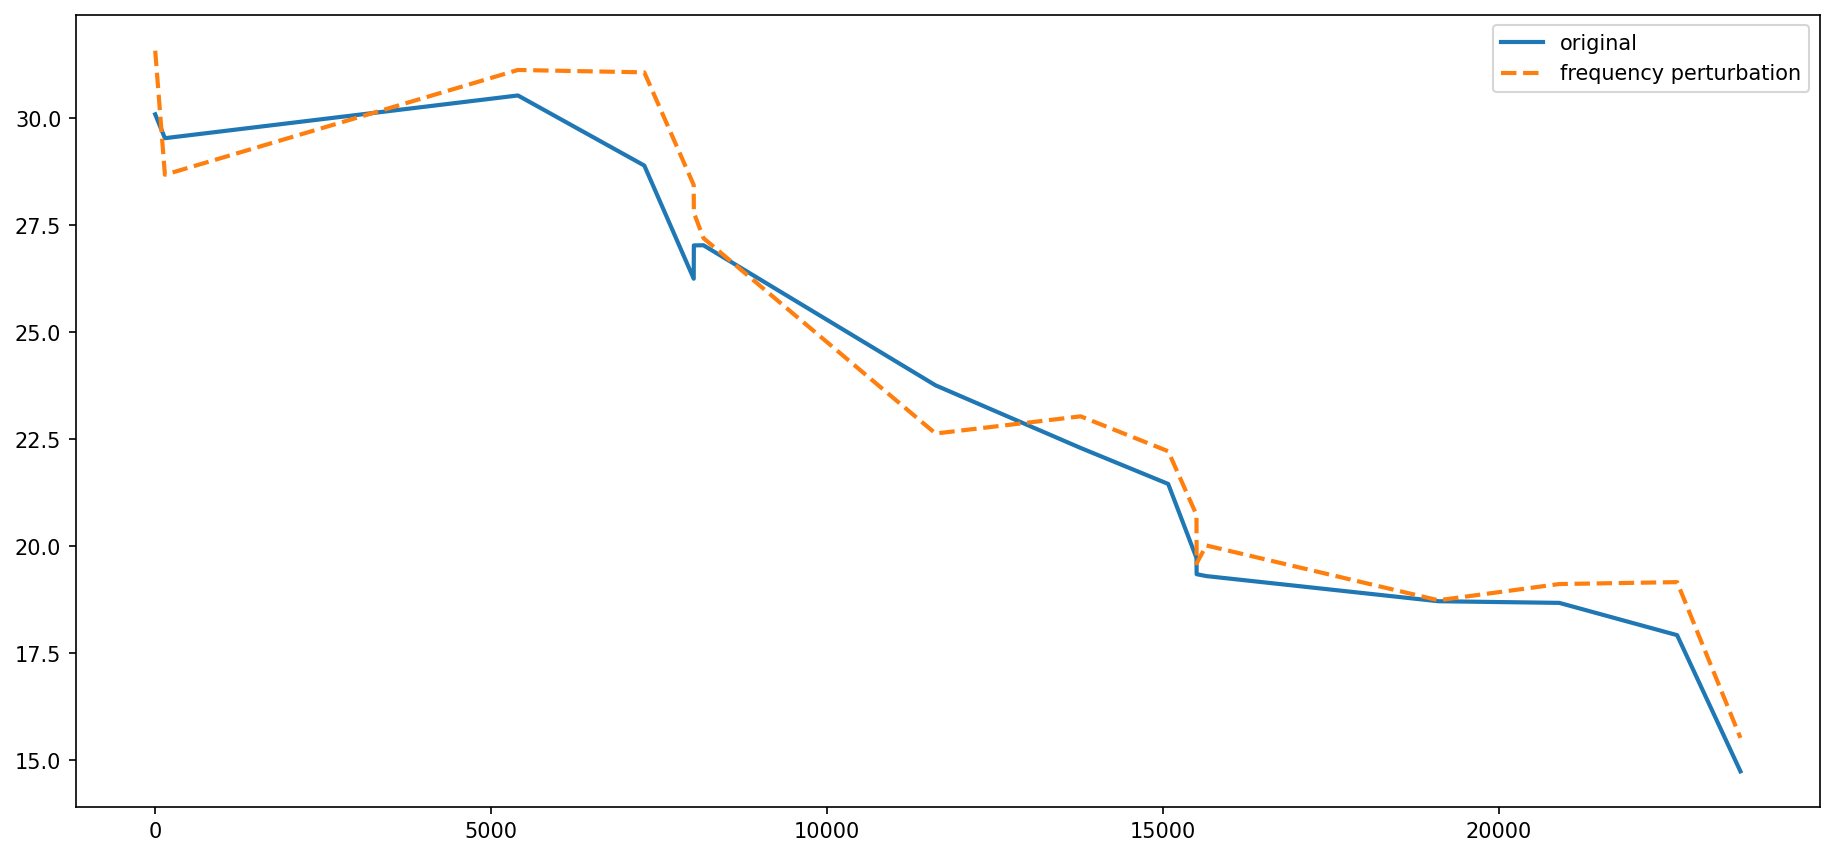

In [104]:
i = np.random.randint(0, 6186)
data = dataset[i]
LHGR = data[:,6:]
FASTF = data[:,1]

# Generate random data
noise = 20 * np.random.rand(*LHGR.shape)
fft_data = np.fft.fft(LHGR) + noise
frequency_data = np.fft.ifft(fft_data)

plt.plot(data[:,0], LHGR[:,4], label="original")
plt.plot(data[:,0], frequency_data[:,4], "--", label="frequency perturbation")
plt.legend()
plt.show()

In [188]:
def generate_new_LHGR(LHGR, noise_factor=0, seed=0):
    np.random.seed(seed)
    noise = noise_factor * np.random.rand(*LHGR.shape)
    fft_data = np.fft.fft(LHGR) + noise
    frequency_data = np.fft.ifft(fft_data)
    return frequency_data.real

def generate_new_LHGRs(dataset, noise_factor=0, seed=0):
    new_LHGRs = []
    for i, data in enumerate(dataset):
        LHGR_original = data[:,6:]
        LHGR_perturbed = generate_new_LHGR(LHGR_original, noise_factor, i)
        new_LHGRs.append(LHGR_perturbed - noise_factor/2)
        
    return new_LHGRs
        

result = generate_new_LHGRs(dataset, 20)

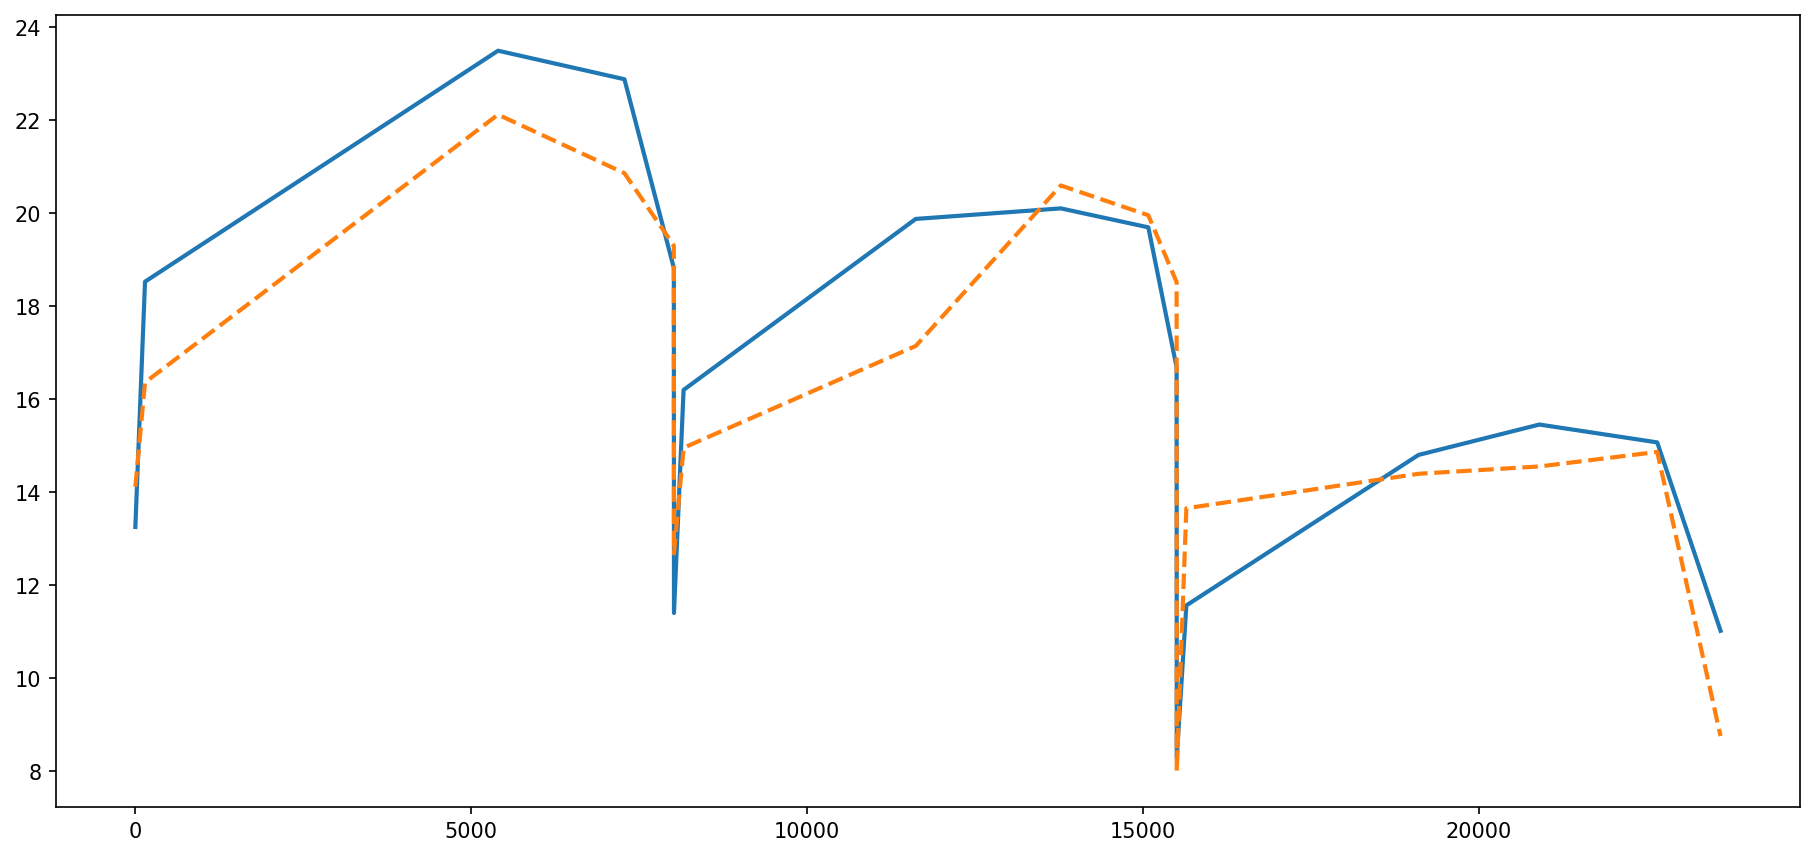

In [189]:
i = np.random.randint(0, 100)
plt.plot(dataset[i][:,0], dataset[i][:,6])
plt.plot(dataset[i][:,0], result[i][:,0], "--")